In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from mlxtend.frequent_patterns import apriori
import warnings
warnings.filterwarnings("ignore")

Data Preprocessing

In [46]:
train=pd.read_csv("Training.csv")
train

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
5           0          1                     1                    0   
6           1          0                     1                    0   
7           1          1                     0                    0   
8           1          1                     1                    0   
9           1          1                     1                    0   
10          0          0                     0                    1   
11          0          0                     0                    0   
12          0          0                     0                    1   
13          0          0                     0                    1   
14          0          0                     0                    1   
15          0          0                     0                    0   
16          0          0                     0                    1   
17          0          0                     0                    1   
18          0          0                     0                    1   
19          0          0                     0                    1   
20          0          0                     0                    0   
21          0          0                     0                    0   
22          0          0                     0                    0   
23          0          0                     0                    0   
24          0          0                     0                    0   
25          0          0                     0                    0   
26          0          0                     0                    0   
27          0          0                     0                    0   
28          0          0                     0                    0   
29          0          0                     0                    0   
30          1          0                     0                    0   
31          0          0                     0                    0   
32          1          0                     0                    0   
33          1          0                     0                    0   
34          1          0                     0                    0   
35          1          0                     0                    0   
36          1          0                     0                    0   
37          1          0                     0                    0   
38          1          0                     0                    0   
39          1          0                     0                    0   
40          1          1                     0                    0   
41          1          0                     0                    0   
42          1          1                     0                    0   
43          1          1                     0                    0   
44          1          1                     0                    0   
45          0          1                     0                    0   
46          1          0                     0                    0   
47          1          1                     0                    0   
48          1          1                     0                    0   
49          1          1                     0                    0   
50          0          0                     0                    0   
51          0          0                     0                    0   
52          0          0                     0                    0   
53          0          0                     0                    0   
54          0          0                     0                    0   
55          0          0      

In [47]:
train.drop('Unnamed: 133', axis=1, inplace=True)
train.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [48]:
df=train
df.isna().sum()

itching                           0
skin_rash                         0
nodal_skin_eruptions              0
continuous_sneezing               0
shivering                         0
chills                            0
joint_pain                        0
stomach_pain                      0
acidity                           0
ulcers_on_tongue                  0
muscle_wasting                    0
vomiting                          0
burning_micturition               0
spotting_ urination               0
fatigue                           0
weight_gain                       0
anxiety                           0
cold_hands_and_feets              0
mood_swings                       0
weight_loss                       0
restlessness                      0
lethargy                          0
patches_in_throat                 0
irregular_sugar_level             0
cough                             0
high_fever                        0
sunken_eyes                       0
breathlessness              

In [49]:
df['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

Data Visualisation

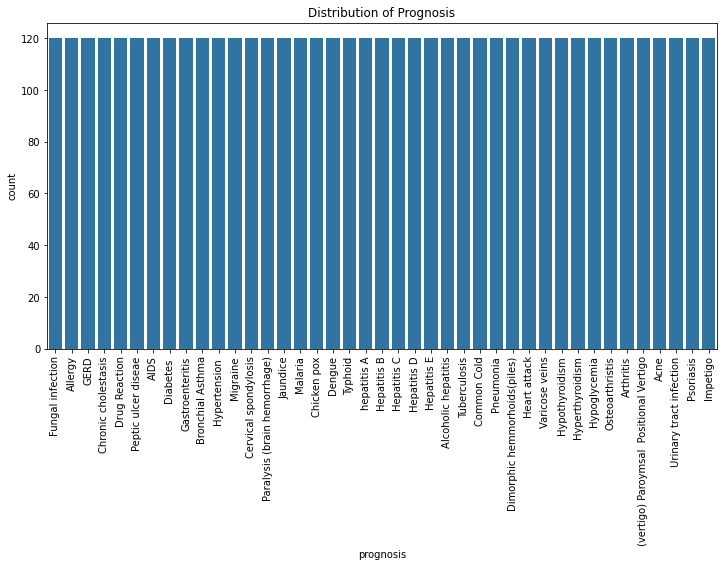

In [50]:
plt.figure(figsize=(12, 6))
sns.countplot(x='prognosis', data=df)
plt.title('Distribution of Prognosis')
plt.xticks(rotation=90)
plt.show()

In [51]:
correlation_matrix = df.corr()
df.corr()

itching  skin_rash  nodal_skin_eruptions  \
itching                         1.000000   0.318158              0.326439   
skin_rash                       0.318158   1.000000              0.298143   
nodal_skin_eruptions            0.326439   0.298143              1.000000   
continuous_sneezing            -0.086906  -0.094786             -0.032566   
shivering                      -0.059893  -0.065324             -0.022444   
chills                         -0.175905  -0.029324             -0.065917   
joint_pain                     -0.160650   0.171134             -0.060200   
stomach_pain                    0.202850   0.161784             -0.032566   
acidity                        -0.086906  -0.094786             -0.032566   
ulcers_on_tongue               -0.059893  -0.065324             -0.022444   
muscle_wasting                 -0.059893  -0.065324             -0.022444   
vomiting                       -0.057763  -0.225046             -0.119543   
burning_micturition             0.207896   0.166507             -0.032103   
spotting_ urination             0.350585   0.298143             -0.022444   
fatigue                         0.069744  -0.105248             -0.120465   
weight_gain                    -0.061573  -0.067156             -0.023073   
anxiety                        -0.061573  -0.067156             -0.023073   
cold_hands_and_feets           -0.061573  -0.067156             -0.023073   
mood_swings                    -0.088129  -0.096120             -0.033025   
weight_loss                     0.091830  -0.139363             -0.047882   
restlessness                   -0.088129  -0.096120             -0.033025   
lethargy                        0.311436   0.067246             -0.047882   
patches_in_throat              -0.059893  -0.065324             -0.022444   
irregular_sugar_level          -0.061573  -0.067156             -0.023073   
cough                          -0.143855  -0.156900             -0.053907   
high_fever                      0.037309   0.117059             -0.092690   
sunken_eyes                    -0.059893  -0.065324             -0.022444   
breathlessness                 -0.126848  -0.138350             -0.047534   
sweating                       -0.159830  -0.174323             -0.059893   
dehydration                    -0.059893  -0.065324             -0.022444   
indigestion                    -0.086906  -0.094786             -0.032566   
headache                       -0.067585   0.053792             -0.081991   
yellowish_skin                  0.300936  -0.207998             -0.071463   
dark_urine                      0.253240  -0.157841             -0.054230   
nausea                         -0.069644  -0.090663             -0.082554   
loss_of_appetite                0.230103   0.049731             -0.082836   
pain_behind_the_eyes           -0.063212   0.341036             -0.023687   
back_pain                      -0.088129   0.204714             -0.033025   
constipation                   -0.088129  -0.096120             -0.033025   
abdominal_pain                  0.263282  -0.224648             -0.077184   
diarrhoea                      -0.143855  -0.156900             -0.053907   
mild_fever                      0.135127   0.110447             -0.041714   
yellow_urine                    0.361723  -0.067156             -0.023073   
yellowing_of_eyes               0.173673  -0.194432             -0.066802   
acute_liver_failure            -0.061573  -0.067156             -0.023073   
fluid_overload                       NaN        NaN                   NaN   
swelling_of_stomach            -0.061573  -0.067156             -0.023073   
swelled_lymph_nodes             0.138099   0.113396             -0.041332   
malaise                         0.221299   0.174242             -0.061117   
blurred_and_distorted_vision   -0.109271  -0.119179             -0.040947   
phlegm                         -0.111317  -0.121411             -0.041714   
throat_irritation            

<Axes: >

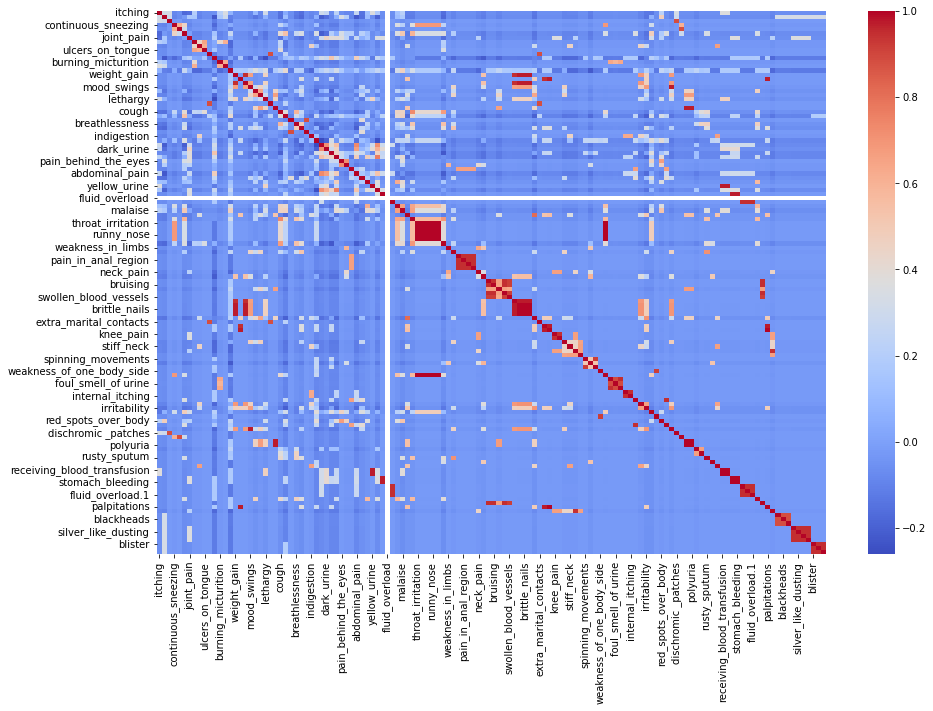

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(),cmap='coolwarm')

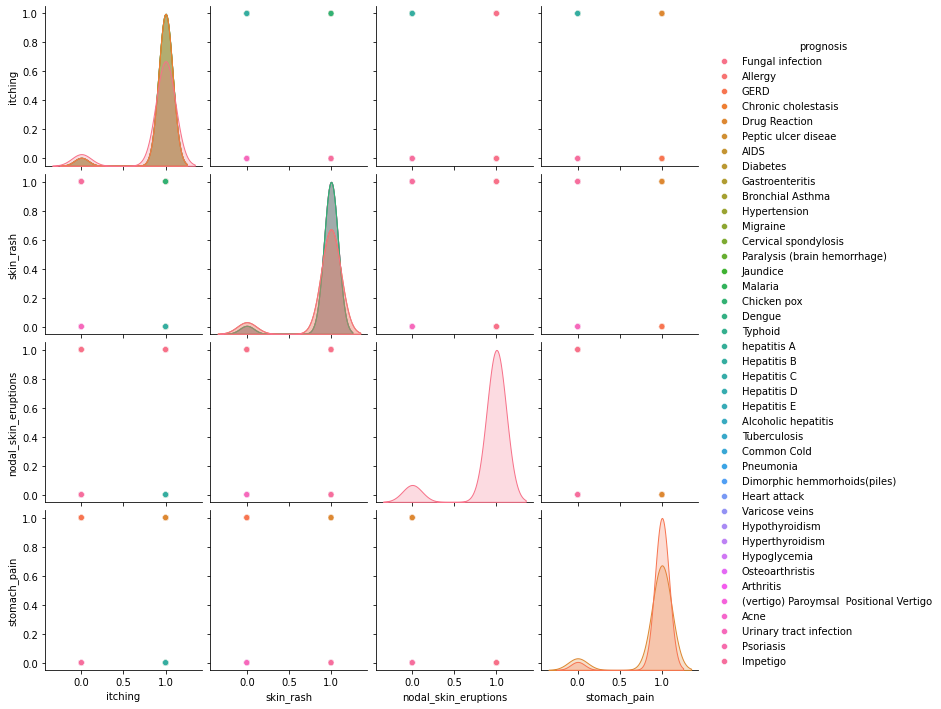

In [53]:
selected_columns = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'stomach_pain', 'prognosis']

sns.pairplot(df[selected_columns], hue='prognosis')

plt.show()


Data Modelling

In [54]:
X = df.drop('prognosis',axis=1)
y = df['prognosis']

Model Training

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree Classifier

In [56]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)
tree_acc = accuracy_score(y_test, tree_pred)
class_report=classification_report(y_test, tree_pred)

print("Decision Tree Classifier:")
print("Accuracy on test set: {:.2f}%".format(tree_acc * 100))
print("Classification Report",class_report)

Decision Tree Classifier:
Accuracy on test set: 100.00%
Classification Report                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Co

Random Forest Classifier

In [57]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
forest_pred = forest.predict(x_test)
forest_acc = accuracy_score(y_test, forest_pred)
class_report=classification_report(y_test, tree_pred)

print("Random Forest Classifier:")
print("Accuracy on test set: {:.2f}%".format(forest_acc * 100))
print("Classification Report",class_report)

Random Forest Classifier:
Accuracy on test set: 100.00%
Classification Report                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Co

Logistic Regression Classifier

In [58]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(y_test, logreg_pred)
class_report=classification_report(y_test, tree_pred)

print("Logistic Regression Classifier:")
print("Accuracy on test set: {:.2f}%".format(logreg_acc * 100))
print("Classification Report",class_report)

Logistic Regression Classifier:
Accuracy on test set: 100.00%
Classification Report                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                        

Model Testing and performance evaluation

In [59]:
df_test=pd.read_csv("Testing.csv")
X = df_test.drop('prognosis',axis=1)
y = df_test['prognosis']

In [60]:
def test_accuracy(model,X):
    
    #predict
    pred = model.predict(X)
    
    #accuracy score
    print("accuracy score = ",accuracy_score(y,pred))
    
    #classification report
    print("\n",classification_report(y,pred))

Decision Tree Classifier Test Report

In [61]:

test_accuracy(tree,X)

accuracy score =  0.9761904761904762

                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.0

Random Forest Classifier Report on Testing

In [62]:
test_accuracy(forest,X)

accuracy score =  0.9761904761904762

                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.0

Logistic Regression Classifier Report

In [63]:
test_accuracy(logreg,X)

accuracy score =  1.0

                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
   

Association Analysis (Apriori)

In [64]:

association_data = df[['prognosis'] + list(df.columns[:-1])]
association_data = pd.get_dummies(association_data)
frequent_itemsets = apriori(association_data, min_support=0.1, use_colnames=True)
print("Frequent Itemsets:\n", frequent_itemsets)

Frequent Itemsets:
      support                                           itemsets
0   0.137805                                          (itching)
1   0.159756                                        (skin_rash)
2   0.162195                                           (chills)
3   0.139024                                       (joint_pain)
4   0.389024                                         (vomiting)
5   0.392683                                          (fatigue)
6   0.114634                                            (cough)
7   0.276829                                       (high_fever)
8   0.137805                                         (sweating)
9   0.230488                                         (headache)
10  0.185366                                   (yellowish_skin)
11  0.115854                                       (dark_urine)
12  0.232927                                           (nausea)
13  0.234146                                 (loss_of_appetite)
14  0.209756        